### Sysarmy sueldos

Dataset: [Sysarmy encuesta sueldos](https://docs.google.com/spreadsheets/d/1h7VSFV2xkbgUi3kmJMVzCtX3RajwkzqdIyQkOsyathw/edit#gid=765652237)

Target variable: `Salario mensual o retiro BRUTO (en tu moneda local)`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sysarmy = pd.read_csv('/content/drive/MyDrive/Datos/TP1/Parte 2/sysarmy_sueldos.csv')
sysarmy

,Dónde estás trabajando,Tipo de contrato,Salario mensual o retiro BRUTO (en tu moneda local),Salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,¿Cuál fue el último valor de dólar que tomaron?,¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,Recibís algún tipo de bono,A qué está atado el bono,...,¿Considerás que tenés oportunidades de crecimiento siendo quien sos dentro de tu organización?,¿Tenés algún tipo de discapacidad?,"¿Sentís que alguna vez los prejuicios culturales/sociales sobre tu orientación, género, etnia o discapacidad pudieron obstaculizar el que consigas un trabajo?","En el último año, en tu trabajo ¿recibiste o escuchaste comentarios que considerás inapropiados, subidos de tono y/o discriminatorios?",¿Salir o seguir contestando?.3,¿Cuántas veces a la semana vas a trabajar a la oficina?,¿Qué tanto sentís que te está apoyando tu empresa/organización durante la pandemia?,¿Instauraron algún beneficio nuevo?,Tengo (edad),Me identifico (género)
0,Catamarca,Tercerizado (trabajo a través de consultora o ...,207000,150000.0,NaN,NaN,2,1,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis
1,Catamarca,Full-Time,130000,99000.0,NaN,NaN,3,4,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
2,Catamarca,Full-Time,185000,145000.0,Mi sueldo está dolarizado (pero cobro en moned...,100,2,2,De uno a tres sueldos,Performance grupal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Trans
3,Catamarca,Full-Time,70000,60000.0,NaN,NaN,3,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Varón Cis
4,Catamarca,Full-Time,90000,74700.0,NaN,NaN,3,2,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Tucumán,Full-Time,280000,280000.0,Cobro en dólares,200,4,4,Menos de un sueldo,Performance grupal,...,Sí,NaN,No,Nunca,Quiero responder más preguntas,0.0,10.0,Ninguna de las anteriores,23,Varón Cis
5850,Tucumán,Full-Time,60000,54000.0,NaN,NaN,2,1,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis
5851,Tucumán,Remoto (empresa de otro país),440000,400000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",NaN,3,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
5852,Tucumán,Full-Time,59500,49385.0,NaN,NaN,2,2,Un sueldo,Performance individual,...,Sí,NaN,No,Nunca,Quiero responder más preguntas,0.0,8.0,Ninguna de las anteriores,31,Varón Cis


In [ ]:
sysarmy.columns

Index(['Dónde estás trabajando', 'Tipo de contrato',
       'Salario mensual o retiro BRUTO (en tu moneda local)',
       'Salario mensual o retiro NETO (en tu moneda local)',
       'Pagos en dólares', '¿Cuál fue el último valor de dólar que tomaron?',
       '¿Qué tan conforme estás con tu sueldo?',
       'Cómo creés que está tu sueldo con respecto al último semestre',
       'Recibís algún tipo de bono', 'A qué está atado el bono',
       '¿Tuviste ajustes por inflación durante 2021?',
       '¿De qué % fue el ajuste total?', '¿En qué mes fue el último ajuste?',
       'Trabajo de', 'Años de experiencia', 'Años en la empresa actual',
       'Años en el puesto actual', '¿Gente a cargo?', 'Plataformas',
       'Lenguajes de programación o tecnologías.',
       'Frameworks, herramientas y librerías', 'Bases de datos',
       'QA / Testing', 'IDEs', 'Cantidad de personas en tu organización',
       'Trabajo para una empresa que no tiene oficina en mi ciudad',
       'Actividad principa

In [ ]:
sysarmy['¿Tuviste ajustes por inflación durante 2021?'].value_counts()

Dos            1614
No             1567
Tres           1020
Uno             959
Más de tres     694
Name: ¿Tuviste ajustes por inflación durante 2021?, dtype: int64

In [ ]:
sysarmy['¿Qué tan conforme estás con tu sueldo?'].value_counts()

3    2689
2    1699
4     990
1     476
Name: ¿Qué tan conforme estás con tu sueldo?, dtype: int64

In [ ]:
def try_parse(n):
  try:
    return float(n)
  except:
    return np.nan

sysarmy['Salario mensual o retiro BRUTO (en tu moneda local)'] = sysarmy.agg({'Salario mensual o retiro BRUTO (en tu moneda local)': try_parse}).dropna()
sysarmy['Salario mensual o retiro BRUTO (en tu moneda local)'].describe()

count    5.754000e+03
mean     2.604537e+05
std      3.020837e+05
min      0.000000e+00
25%      1.150000e+05
50%      1.877500e+05
75%      3.000000e+05
max      8.400000e+06
Name: Salario mensual o retiro BRUTO (en tu moneda local), dtype: float64

In [ ]:
sueldos = sysarmy[['¿Qué tan conforme estás con tu sueldo?', '¿Tuviste ajustes por inflación durante 2021?', 'Salario mensual o retiro BRUTO (en tu moneda local)']]
sueldos.columns = ['Conformidad con el sueldo', 'Cantidad de ajustes por inflación en 2021', 'Salario']
sueldos

,Conformidad con el sueldo,Cantidad de ajustes por inflación en 2021,Salario
0,2,Dos,207000.0
1,3,Tres,130000.0
2,2,Uno,185000.0
3,3,No,70000.0
4,3,No,90000.0
...,...,...,...
5849,4,No,280000.0
5850,2,Dos,60000.0
5851,3,Uno,440000.0
5852,2,Dos,59500.0


In [ ]:
matriz = pd.pivot_table(sueldos, values='Salario', index='Conformidad con el sueldo', columns='Cantidad de ajustes por inflación en 2021', aggfunc='mean')
matriz = matriz.reindex([4, 3, 2, 1])
matriz = matriz[['No', 'Uno', 'Dos', 'Tres', 'Más de tres']]
matriz

Cantidad de ajustes por inflación en 2021,No,Uno,Dos,Tres,Más de tres
Conformidad con el sueldo,,,,,
4,637283.149436,375155.078855,337899.223312,333839.199000,373575.276069
3,288381.581168,220122.792706,233629.112688,247826.666867,273715.764255
2,169941.526548,153777.130327,178251.278539,206180.937636,203556.829467
1,95936.332647,131106.080085,171646.900826,164928.777818,213933.093750


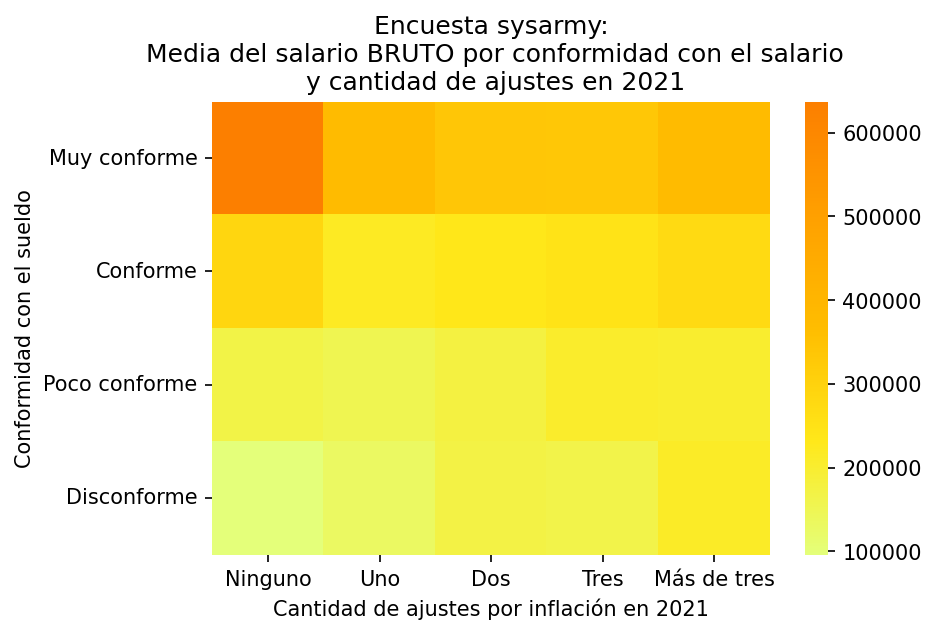

In [ ]:
plt.figure(dpi=150)
g = sns.heatmap(matriz, cmap='Wistia')
g.set_yticklabels(['Muy conforme', 'Conforme', 'Poco conforme', 'Disconforme'], rotation=0)
g.set_xticklabels(['Ninguno', 'Uno', 'Dos', 'Tres', 'Más de tres'])
plt.title('Encuesta sysarmy:\n Media del salario BRUTO por conformidad con el salario\n y cantidad de ajustes en 2021')
plt.show()

In [ ]:
sysarmy['Años de experiencia'].unique()

array([ 9. ,  7. ,  2. ,  5. ,  0. , 36. ,  3. , 25. , 10. , 24. ,  8. ,
        1. , 11. ,  6. ,  4. ,  2.5, 12. , 13. , 14. , 15. , 16. , 17. ,
       30. , 20. , 27. , 23. , 34. , 18. , 22. , 21. , 26. ,  1.5, 33. ,
       19. , 35. ,  1.6, 28. , 40. , 38. , 29. , 42. , 32. , 47. , 31. ,
       37. ,  3.3,  1.3,  0.5,  2.3,  4.5,  3.5])

In [ ]:
experiencia = sysarmy[['Años de experiencia', 'Salario mensual o retiro BRUTO (en tu moneda local)']]
experiencia = experiencia.dropna()
experiencia.dtypes

Años de experiencia                                    float64
Salario mensual o retiro BRUTO (en tu moneda local)    float64
dtype: object

In [ ]:
def experiencia_categoria(e):
  if e < 2:
    return 'Menos de 2'
  if e < 6:
    return 'Entre 2 y 6'
  if e < 10:
    return 'Entre 6 y 10'
  return 'Más de 10'

experiencia['experiencia_categoria'] = experiencia['Años de experiencia'].map(experiencia_categoria) 
experiencia

,Años de experiencia,Salario mensual o retiro BRUTO (en tu moneda local),experiencia_categoria
0,9.0,207000.0,Entre 6 y 10
1,7.0,130000.0,Entre 6 y 10
2,2.0,185000.0,Entre 2 y 6
3,5.0,70000.0,Entre 2 y 6
4,0.0,90000.0,Menos de 2
...,...,...,...
5849,3.0,280000.0,Entre 2 y 6
5850,1.0,60000.0,Menos de 2
5851,2.0,440000.0,Entre 2 y 6
5852,1.0,59500.0,Menos de 2


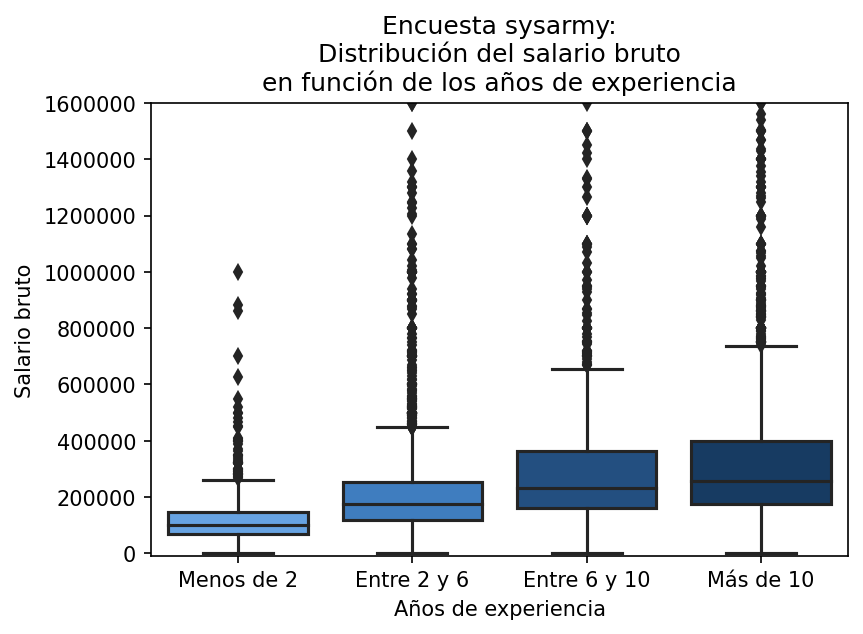

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=experiencia, x='experiencia_categoria', y='Salario mensual o retiro BRUTO (en tu moneda local)', order=['Menos de 2', 'Entre 2 y 6', 'Entre 6 y 10', 'Más de 10'], palette=['#52a2f7', '#2a7cd4', '#144e8f', '#0b3b6e'])
plt.ylim(-0.01e6,16e5)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Encuesta sysarmy:\nDistribución del salario bruto\nen función de los años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario bruto')
plt.show()